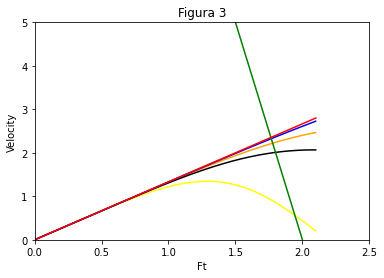

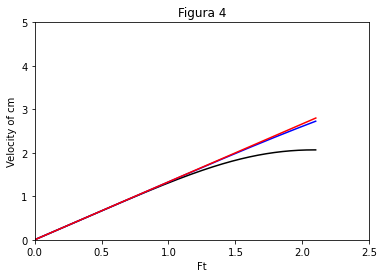

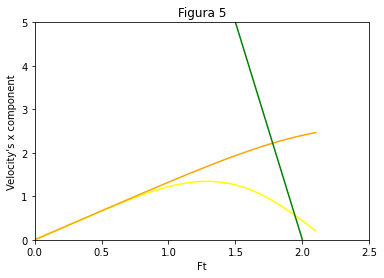

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#1)Tabella 1, parametri fissati per lo studio computazionale del pendolo balistico
m1 = 0.1
m2 = 0.75
V0 = 20
R = 0.3
vf = 2.353
g1 = 0
g2 = 9.81
n = 2000
grad = 57.2958

Ft = np.linspace(0, 2.1, n)             #2) Valori delle ascisse della figura 1, scirviamo quindi v(Ft)

def V1x(x):                                #3) Componente x velocità del proiettile
    return V0 - x / m1
V1X = V1x(Ft)

def v2(x):                                 #4) Velocità v2 del cm del sistema pendolo-proiettile considerando che formino un sistema isolato (conservazione della quantità di moto)
    return x / m2
V2 = v2(Ft)

def V2x(x, y):                             #5) Componente x della velocità v2 (del cm del pendolo) considerando il moto relativo
    return y * np.cos(x)                     # Continua dopo perchè mi servono teta e V2 dall'eq. diff

def f(x, v, F, g):                         #6) Equazione differenziale del moto relativo del pendolo in coordinate polari
    return (((F * np.cos(x)) / (m2 + (m1 * (np.sin(x)) ** 2))) - ((m1 * (v ** 2) * (np.sin(x)) ** 2)/(2 * R * (m2 + (m1 * (np.sin(x) ** 2))))) - (((m1 + m2) * g * np.sin(x))/(m2 + (m1 * (np.sin(x)) ** 2))))

def f_2(x, csi, F, g):                     #7) Secondo membro del sistema di eq. diff. del prim'ordine, in funzione di z=Ft
     return f(x, R * F * csi, F, g) / ((F ** 2) * R)

def f_3(x, csi, F, g):                     #8) Secondo membro del sistema di eq. diff. del prim'ordine (stesso precedente), in funzione di t
    return f(x, R * csi, F, g) / R

x0 = 0
csi0 = 0
t0 = 0
def RK4(F, func, fine, g):                 #9) Algoritmo di Runge-Kutta
    h = fine / n
    t = t0
    x = x0
    csi = csi0
    T = np.zeros(n)
    X = np.zeros(n)
    V = np.zeros(n)
    for i in range(n):
        T[i] = t
        X[i] = x
        if func == f_2:
            V[i] = R * F * csi
        elif func == f_3:
            V[i] = R * csi

        K1 = h * csi
        M1 = h * func(x, csi, F, g)

        K2 = h * (csi + M1/2)
        M2 = h * func(x + (K1/2), csi+(M1/2), F, g)

        K3 = h * (csi + (M2/2))
        M3 = h * func(x + (K2/2), csi + (M2/2), F, g)

        K4 = h * (csi + (M3/2))
        M4 = h * func(x + K3, csi + M3, F, g)

        x += (K1/6) + (K2/3) + (K3/ 3) + (K4/6)
        csi += (M1/6) + (M2/3) + (M3/3) + (M4/6)
        t = t + h

    M = np.array((T, X, V))
    return M                              # M è una matrice con 3 righe ed n colonne. La prima riga è quella del tempo, la seconda riga è quella di teta e la terza riga è V (Tutto in funzione di Ft grazie alla trasformazione di coordinate)


#5) Possiamo scrivere d e d'
G6 = RK4(6, f_2, 2.1, g1)
V2x_6 = V2x(G6[1], G6[2])

G22 = RK4(22, f_2, 2.1, g1)
V2x_22 = V2x(G22[1], G22[2])

#10) Plottiamo tutte e 6 le Curve
plt.plot(G6[0], V2x_6, color="yellow")              # d'
plt.plot(G22[0], V2x_22, color="orange")            # d
plt.plot(G6[0], G6[2], color="black")               # c'
plt.plot(G22[0], G22[2], color="blue")              # c
plt.plot(Ft, V1X, color="green")                    # a
plt.plot(Ft, V2, color="red")                       # b
plt.xlabel("Ft")
plt.ylabel("Velocity")
plt.title("Figura 3")
plt.xlim(0, 2.5)
plt.ylim(0, 5)
plt.show()

plt.plot(G6[0], G6[2], color="black")               # c'
plt.plot(G22[0], G22[2], color="blue")              # c
plt.plot(Ft, V2, color="red")                       # b
plt.xlabel("Ft")
plt.ylabel("Velocity of cm")
plt.title("Figura 4")
plt.xlim(0, 2.5)
plt.ylim(0, 5)
plt.show()

plt.plot(G6[0], V2x_6, color="yellow")              # d'
plt.plot(G22[0], V2x_22, color="orange")            # d
plt.plot(Ft, V1X, color="green")                    # a
plt.xlabel("Ft")
plt.ylabel("Velocity's x component")
plt.title("Figura 5")
plt.xlim(0, 2.5)
plt.ylim(0, 5)
plt.show()

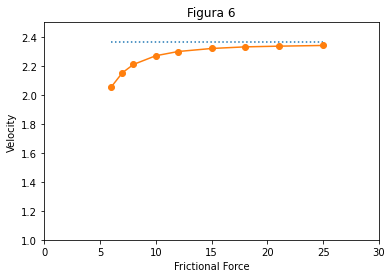

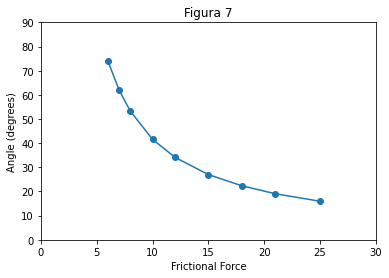

In [2]:
FF = np.array((6, 7, 8, 10, 12, 15, 18, 21, 25))                   #11) Array di Forze di Attrito tra proiettile e pendolo

#12) Soluzioni dell'equzioni differenziali al variare di F e con g = 0
G7 = RK4(7, f_2, 2.1, g1)
V2x_7 = V2x(G7[1], G7[2])

G8 = RK4(8, f_2, 2.1, g1)
V2x_8 = V2x(G8[1], G8[2])

G10 = RK4(10, f_2, 2.1, g1)
V2x_10 = V2x(G10[1], G10[2])

G12 = RK4(12, f_2, 2.1, g1)
V2x_12 = V2x(G12[1], G12[2])

G15 = RK4(15, f_2, 2.1, g1)
V2x_15 = V2x(G15[1], G15[2])

G18 = RK4(18, f_2, 2.1, g1)
V2x_18 = V2x(G18[1], G18[2])

G21 = RK4(21, f_2, 2.1, g1)
V2x_21 = V2x(G21[1], G21[2])

G25 = RK4(25, f_2, 2.1, g1)
V2x_25 = V2x(G25[1], G25[2])

TG = np.array((G6[0], G7[0], G8[0], G10[0], G12[0], G15[0], G18[0], G21[0], G25[0]))
AG = np.array((G6[1], G7[1], G8[1], G10[1], G12[1], G15[1], G18[1], G21[1], G25[1]))
VG = np.array((G6[2], G7[2], G8[2], G10[2], G12[2], G15[2], G18[2], G21[2], G25[2]))
V = np.array((V2x_6, V2x_7, V2x_8, V2x_10, V2x_12, V2x_15, V2x_18, V2x_21, V2x_25))

def Inter(A, B, C, D):                            #13) Funzione d'intersenzione generale
    e = 0.004
    ind = []
    for i in range(n):
        for j in range(n):
            if abs(A[i] - B[j]) <= e and abs(C[i] - D[j]) <= e:
                ind.append(i)
    c = (sum(ind)/len(ind))
    return c

indici = np.zeros(len(FF))
for l in range(len(FF)):
    indici[l] = Inter(Ft, TG[l], V1X, V[l])       #14) Intersezione tra la funzione V1x e le varie funzioni ottenute dal Runge-Kutta
indici = np.array(indici, dtype=int)

#15) Dagli indici ottenuti possiamo ricavare i corrispondenti valori di Velocità e Angoli finali
Vfinali = np.zeros(len(FF))
for i in range(len(FF)):
    Vfinali[i] = VG[i, indici[i]]

Afinali = np.zeros(len(FF))
for i in range(len(FF)):
    Afinali[i] = AG[i, indici[i]]

A = np.ones(len(FF))
plt.plot(FF, A*2.365, linestyle=":")
plt.plot(FF, Vfinali, marker="o")
plt.xlabel("Frictional Force")
plt.ylabel("Velocity")
plt.title("Figura 6")
plt.ylim(1, 2.5)
plt.xlim(0, 30)
plt.show()

plt.plot(FF, Afinali*grad, marker="o")
plt.xlabel("Frictional Force")
plt.ylabel("Angle (degrees)")
plt.title("Figura 7")
plt.ylim(0, 90)
plt.xlim(0, 30)
plt.show()

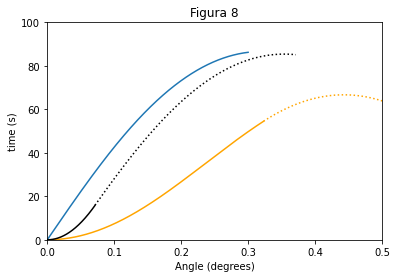

In [3]:
Tfinali = np.zeros(len(FF))
for i in range(len(FF)):
    Tfinali[i] = TG[i, indici[i]]


#16) Array dei tempi (d'ora in poi scriveremo tutto in funzione del tempo)
T = np.linspace(0, 0.5, n)
tfin = 0.3
h = tfin/n
def seno(alpha):                   #17) Equazione differenziale del pnedolo semplice
    return (-(g2/R)*np.sin(alpha))

def alpha_func(tempo0, alpha0, v0):     #18) Runge-kutta per l'eq seno (è diverso dal precedente perchè nel seno si ha unsa sola variabile)
    alpha = alpha0
    omega = v0/R
    tempo = tempo0
    TT = np.zeros(n)
    AL = np.zeros(n)
    OM = np.zeros(n)
    for i in range(n):
        TT[i] = tempo

        K1 = h * omega
        M1 = h * seno(alpha)

        K2 = h * (omega + M1 / 2)
        M2 = h * seno(alpha + (K1 / 2))

        K3 = h * (omega + M2 / 2)
        M3 = h * seno(alpha + (K2 / 2))

        K4 = h * (omega + M3 / 2)
        M4 = h * seno(alpha + K3)

        alpha += (K1/6) + (K2/3) + (K3/3) + (K4/6)
        omega += (M1/6) + (M2/3) + (M3/3) + (M4/6)

        AL[i] = alpha
        OM[i] = omega

        tempo = tempo + h

    MALPHA = np.array((TT, AL, OM))
    return MALPHA

V1X_6 = V1x(6 * T)                       #19) v1x in funzione del tempo con F=6
V1X_25 = V1x(25 * T)                        # v1x in funzione del tempo con F=25

G6_2 = RK4(6, f_3, 0.5, g2)
V2x_6_2 = V2x(G6_2[1], G6_2[2])          #20) componenti x di v2 del cm del pendolo con g=9.81 per F=6 e F=25

G25_2 = RK4(25, f_3, 0.5, g2)
V2x_25_2 = V2x(G25_2[1], G25_2[2])

indi = np.array((Inter(T, G6_2[0], V1X_6, V2x_6_2), Inter(T, G25_2[0], V1X_25, V2x_25_2)))
indi = np.array(indi, dtype=int)

a = alpha_func(0, 0, V0*m1/(m1+m2))
b = alpha_func(G6_2[0, indi[0]], G6_2[1, indi[0]], G6_2[2, indi[0]])
c = alpha_func(G25_2[0, indi[1]], G25_2[1, indi[1]], G25_2[2, indi[1]])

plt.plot(a[0], a[1]*grad)
plt.plot(b[0], b[1]*grad, color="orange", linestyle=":")
plt.plot(c[0], c[1]*grad, color="black", linestyle=":")
plt.plot(G6_2[0, :indi[0]],  G6_2[1,:indi[0]]*grad, color="orange")
plt.plot(G25_2[0, :indi[1]], G25_2[1, :indi[1]]*grad, color="black")
plt.xlabel("Angle (degrees)")
plt.ylabel("time (s)")
plt.title("Figura 8")
plt.xlim(0, 0.5)
plt.ylim(0, 100)
plt.show()

metodo 1: [66.68440731 71.13665139 74.37876017 78.62566057 81.11044004 83.09755177
 83.98884386 84.72849658 85.40346572]


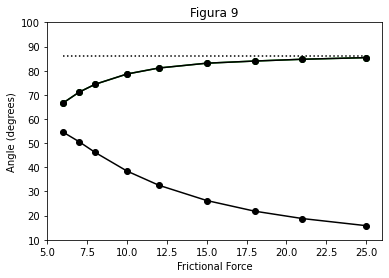

metodo 2: [66.68441421 71.13665139 74.37876017 78.62567217 81.11044004 83.09756005
 83.98884918 84.72850551 85.40346572]


In [4]:

#21) soluzioni dell'equazione diff. tramite Runge-Kutta RK4() con g = 9.81
G6_2 = RK4(6, f_3, 0.5, g2)
V1x6_2 = V1x(6 * T)
V2x6_2 = V2x(G6_2[1], G6_2[2])

G7_2 = RK4(7, f_3, 0.5, g2)
V1x7_2 = V1x(7 * T)
V2x7_2 = V2x(G7_2[1], G7_2[2])

G8_2 = RK4(8, f_3, 0.5, g2)
V1x8_2 = V1x(8 * T)
V2x8_2 = V2x(G8_2[1], G8_2[2])

G10_2 = RK4(10, f_3, 0.5, g2)
V1x10_2 = V1x(10*T)
V2x10_2 = V2x(G10_2[1], G10_2[2])

G12_2 = RK4(12, f_3, 0.5, g2)
V1x12_2 = V1x(12*T)
V2x12_2 = V2x(G12_2[1], G12_2[2])

G15_2 = RK4(15, f_3, 0.5, g2)
V1x15_2 = V1x(15*T)
V2x15_2 = V2x(G15_2[1], G15_2[2])

G18_2 = RK4(18, f_3, 0.5, g2)
V1x18_2 = V1x(18 * T)
V2x18_2 = V2x(G18_2[1], G18_2[2])

G21_2 = RK4(21, f_3, 0.5, g2)
V1x21_2 = V1x(21 * T)
V2x21_2 = V2x(G21_2[1], G21_2[2])

G25_2 = RK4(25, f_3, 0.5, g2)
V1x25_2 = V1x(25 * T)
V2x25_2 = V2x(G25_2[1], G25_2[2])

TG_2 = np.array((G6_2[0], G7_2[0], G8_2[0], G10_2[0], G12_2[0], G15_2[0], G18_2[0], G21_2[0], G25_2[0]))
AG_2 = np.array((G6_2[1], G7_2[1], G8_2[1], G10_2[1], G12_2[1], G15_2[1], G18_2[1], G21_2[1], G25_2[1]))
VG_2 = np.array((G6_2[2], G7_2[2], G8_2[2], G10_2[2], G12_2[2], G15_2[2], G18_2[2], G21_2[2], G25_2[2]))
V_1 = np.array((V1x6_2, V1x7_2, V1x8_2, V1x10_2, V1x12_2, V1x15_2, V1x18_2, V1x21_2, V1x25_2))
V_2 = np.array((V2x6_2, V2x7_2, V2x8_2, V2x10_2, V2x12_2, V2x15_2, V2x18_2, V2x21_2, V2x25_2))
ind = np.zeros(len(FF))
for q in range(len(FF)):
    ind[q] = Inter(T, TG_2[q], V_1[q], V_2[q])

ind = np.array(ind, dtype=int)

Tfinali2 = np.zeros(len(FF))
for k in range(len(FF)):
    Tfinali2[k] = TG_2[k, ind[k]]

Afinali2 = np.zeros(len(FF))                                  #22) Posizione dell'angolo a tc, ossia fine del moto relativo tra pendolo e proiettile
for f in range(len(FF)):
    Afinali2[f] = AG_2[f, ind[f]]

Vfinali2 = np.zeros(len(FF))
for k in range(len(FF)):
    Vfinali2[k] = VG_2[k, ind[k]]

#23) Troviamo i valori di theta massimo al variare della forza F
A = a[1].max()
L2 = alpha_func(T[0], G6_2[1, ind[0]], G6_2[2, ind[0]])[1].max()
L3 = alpha_func(T[1], G7_2[1, ind[1]], G7_2[2, ind[1]])[1].max()
L4 = alpha_func(T[2], G8_2[1, ind[2]], G8_2[2, ind[2]])[1].max()
L5 = alpha_func(T[3], G10_2[1, ind[3]], G10_2[2, ind[3]])[1].max()
L6 = alpha_func(T[4], G12_2[1, ind[4]], G12_2[2, ind[4]])[1].max()
L7 = alpha_func(T[5], G15_2[1, ind[5]], G15_2[2, ind[5]])[1].max()
L8 = alpha_func(T[6], G18_2[1, ind[6]], G18_2[2, ind[6]])[1].max()
L9 = alpha_func(T[7], G21_2[1, ind[7]], G21_2[2, ind[7]])[1].max()
L10 = alpha_func(T[8], G25_2[1, ind[8]], G25_2[2, ind[8]])[1].max()

LL = np.array((L2, L3, L4, L5, L6, L7, L8, L9, L10))

OM0 = alpha_func(T[0], G6_2[1, ind[0]], G6_2[2, ind[0]])
OM1 = alpha_func(T[1], G7_2[1, ind[1]], G7_2[2, ind[1]])
OM2 = alpha_func(T[2], G8_2[1, ind[2]], G8_2[2, ind[2]])
OM3 = alpha_func(T[3], G10_2[1, ind[3]], G10_2[2, ind[3]])
OM4 = alpha_func(T[4], G12_2[1, ind[4]], G12_2[2, ind[4]])
OM5 = alpha_func(T[5], G15_2[1, ind[5]], G15_2[2, ind[5]])
OM6 = alpha_func(T[6], G18_2[1, ind[6]], G18_2[2, ind[6]])
OM7 = alpha_func(T[7], G21_2[1, ind[7]], G21_2[2, ind[7]])
OM8 = alpha_func(T[8], G25_2[1, ind[8]], G25_2[2, ind[8]])
TT_EQ = np.array((OM0[0], OM1[0], OM2[0], OM3[0], OM4[0], OM5[0], OM6[0], OM7[0], OM8[0]))
OM_EQ = np.array((OM0[2], OM1[2], OM2[2], OM3[2], OM4[2], OM5[2], OM6[2], OM7[2], OM8[2]))
AL_EQ = np.array((OM0[1], OM1[1], OM2[1], OM3[1], OM4[1], OM5[1], OM6[1], OM7[1], OM8[1]))
null = np.zeros(n)
null1 = np.zeros(n)
null2 = np.zeros(n)

indi = np.zeros(9)
angoli = np.zeros(9)
for l in range (len(FF)):
    indi[l] = Inter(null1, null2, OM_EQ[l], null)
    indi = np.array(indi, dtype=int)
    angoli[l] = AL_EQ[l, indi[l]]

print("metodo 1:", angoli*grad)
MAX = np.ones(len(FF))*A
plt.plot(FF, MAX*grad, linestyle=":", color="black")
plt.plot(FF, angoli*grad,color="green", marker="o")
plt.plot(FF, LL*grad, color="black", marker="o")
plt.plot(FF, Afinali2*grad, color="black", marker="o")
plt.xlabel("Frictional Force")
plt.ylabel("Angle (degrees)")
plt.title("Figura 9")
plt.xlim(5, 26)
plt.ylim(10, 100)
plt.show()

print("metodo 2:",LL*grad)

In [5]:

TC = np.zeros(len(FF))
for i in range(len(FF)):
    TC[i] = Tfinali[i] / FF[i]

# devo definire i displacements orizzontali
dx1 = np.zeros(len(FF))
dx2 = np.zeros(len(FF))
for j in range(len(FF)):
    dx2[j] = R * np.sin(Afinali[j])
    dx1[j] = (V0*TC[j] - (1/2)*(FF[j]/m1)*((TC[j])**2))

delta_E = []
Lavoro = []
for d in range(len(FF)):
    de_en = (1 / 2)*((m1 + m2)*(Vfinali[d])**2 - m1*(V0)**2)
    work = -(FF[d]) * (dx1[d] - dx2[d])  # è un lavoro resistente
    delta_E = np.append(delta_E, de_en)
    Lavoro = np.append(Lavoro, work)
print("DE=", delta_E)
print("L=", Lavoro)

DE= [-18.20779041 -18.0317838  -17.92476635 -17.81050169 -17.7539541
 -17.7129397  -17.69088915 -17.68129139 -17.67166735]
L= [-18.25325583 -18.09312678 -17.98716118 -17.8626069  -17.79565616
 -17.74150977 -17.71240381 -17.69496012 -17.6808218 ]
